🌟 The link to my github page can be found [here](https://ajasica.github.io/ "ajasica.github.io"). 🌟

# Final Data Science Tutorial
**CMPS 3660-02 Fall 2019 - Introduction to Data Science - Professor Mattei  
Addie Jasica**

## Milestone 1: Data and Website


**Data**

For our Final Tutorial Project I am interested in going a couple different routes. 

The first would to be attempting to tie my second major into my work for this class by evaluating some dataset relating to Public Health. In order to do this I have been looking into the [data.nola.gov 9-1-1 Service call databases](https://data.nola.gov/Public-Safety-and-Preparedness/Calls-for-Service-2018/9san-ivhk). The New Orleans 9-1-1 datasets are put out yearly and range from 2011-2019. They hold records of the location of the call, whether the call was initiated by a police officer or a callin, the category of the reason for the service call, and the priority under which the the call is filed. 

Another database I have been interested in is the [AIDS database](https://think.cs.vt.edu/corgis/csv/aids/) from the CORGIS Dataset Project. This dataset holds data about AIDS prevalence in various countries with data between the years of 1990 and 2015. This is a pretty extensive and holds the data from the UN Nations that are currently affected by AIDS cases. The time span of this database is quite large and so one could really see how the AIDS prevalence has shifted as the US AIDS epidemic began to decrease.

The other datasets that interest me and that are not related to Public Health include the [NYC MTA's Lost and Found database](http://advisory.mtanyct.info/LPUWebServices/CurrentLostProperty.aspx) which outlines all of the items in its lost and found inventory. This is a database updated hourly so it could be interesting to track it over a period of time and look at variety and items that are lost most frequently, etc. 

Finally, I am looking into the Center for Disease Control and Prevention's [Underlying Cause of Death database](https://wonder.cdc.gov/ucd-icd10.html). This database uses death certificates and can provide you with a text file of death information in a variety of ways. I think in order to make the database more specific I would focus on the datasets relating to a couple of specific years and broken down my state rather than census blocks. A dataset by census blocks might be a little too in depth for a project of this size and add unnecessary difficulty. 

At the moment, I have been able to confirm that I can download all of these datasets into a CSV, text, or XML file. They are all publically accessible.

**Website**

The website is linked in the first cell and can be found at [ajasica.github.io](https://ajasica.github.io).

## Milestone 2: Extraction, Transform, and Load (ETL) + Exploratory Data Analysis (EDA)

**Final Tutorial Dataset**

Ultimately, I have decided to use the Center for Disease Control and Prevention/National Center for Health Statistics' dataset which offers the causes of death in Louisiana broken down by year, age bracket, cause of death, the absolute number of deaths, and the death rate based off of the population. I have chosen to not include deaths of infants under 1 year old due to that following a difference set of codes.

This dataset was downloaded in two parts, the first is years 1990-2009 and the second is years 2010-2017. They are slightly more complicated to load since they are text files and not comma separated value files.

**Extraction**

This dataset was extracted from the [CDC Wonder Website](https://wonder.cdc.gov/ucd-icd10.html]). Here, after agreeing the dataset's use restrictions, you can select your own queries based upon how you want the data broken down. This data can be broken down by location on various levels including state, county, census region/divisions, and HHS region levels. Additionally it allows you the opportunity to select age ranges, age brackets, year selections, racial breakdowns, place of death, and the system with which you want the data coded.

**Load**

To load this data, I utilized pandas' read_csv() function showing the seperator value as a tab. The heads of each table (without any transformation or cleaning) are displayed below.

In [1]:
import pandas as pd

In [2]:
deaths99_09 = pd.read_csv('Underlying Cause of Death, 1999-2009 LA.txt', sep="\t")
deaths10_17 = pd.read_csv('Underlying Cause of Death, 2010-2017 LA.txt', sep="\t")

In [3]:
deaths99_09.head()

Notes  Year  Year Code Ten-Year Age Groups Ten-Year Age Groups Code  \
0    NaN  1999       1999           1-4 years                      1-4   
1    NaN  1999       1999           1-4 years                      1-4   
2    NaN  1999       1999           1-4 years                      1-4   
3    NaN  1999       1999           1-4 years                      1-4   
4    NaN  1999       1999           1-4 years                      1-4   

                               ICD-10 113 Cause List  \
0  #Congenital malformations, deformations and ch...   
1                     All other diseases (Residual)    
2  #Accidents (unintentional injuries) (V01-X59,Y...   
3                  Transport accidents (V01-V99,Y85)   
4  Motor vehicle accidents (V02-V04,V09.0,V09.2,V...   

  ICD-10 113 Cause List Code  Deaths  Population  Crude Rate  
0                  GR113-109      12      253052  Unreliable  
1                  GR113-111      18      253052  Unreliable  
2                  GR113-112      46      253052        18.2  
3                  GR113-113      24      253052         9.5  
4                  GR113-114      21      253052         8.3

In [4]:
deaths10_17.head()

Notes  Year  Year Code Ten-Year Age Groups Ten-Year Age Groups Code  \
0    NaN  2010       2010           1-4 years                      1-4   
1    NaN  2010       2010           1-4 years                      1-4   
2    NaN  2010       2010           1-4 years                      1-4   
3    NaN  2010       2010           1-4 years                      1-4   
4    NaN  2010       2010           1-4 years                      1-4   

                               ICD-10 113 Cause List  \
0                     All other diseases (Residual)    
1  #Accidents (unintentional injuries) (V01-X59,Y...   
2                  Transport accidents (V01-V99,Y85)   
3  Motor vehicle accidents (V02-V04,V09.0,V09.2,V...   
4               Nontransport accidents (W00-X59,Y86)   

  ICD-10 113 Cause List Code  Deaths  Population  Crude Rate  
0                  GR113-111      10      252378  Unreliable  
1                  GR113-112      35      252378        13.9  
2                  GR113-113      15      252378  Unreliable  
3                  GR113-114      15      252378  Unreliable  
4                  GR113-117      20      252378         7.9

**Transformation and Tidying**

First, these two dataframes should be combined and the extra "Notes" (which I confirmed holds nothing but NaNs) should be dropped. Additionally, the "Crude Rate" column holds an object with the calculation of the death / population * 100,000 so it is the death rate per 100,000 people. For causes with small amounts of deaths, the death rate is marked as "Unreliable" and so in changing that column to a numeric, those "Unreliable" cells are now NaNs.

In [5]:
deaths_df = pd.concat([deaths99_09, deaths10_17], ignore_index=True)
deaths_df.drop("Notes", axis=1, inplace=True)

In [6]:
deaths_df["Crude Rate"] = pd.to_numeric(deaths_df["Crude Rate"], errors="coerce")

Next, I wanted to see the difference between the "Year" and "Year Code" column. Using the .unique() function, you can see that these columns are redundant. Thus I will drop the "Year Code" column.

In [7]:
print(deaths_df["Year"].unique())
print(deaths_df["Year Code"].unique())

deaths_df.drop("Year Code", axis=1, inplace=True)

[1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]
[1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]


Similarly, the "Ten-Year Age Groups" and "Ten-Year Age Groups Code" columns hold the same information just in slightly different formats so I will keep the latter which is the simpler of the two columns. I will also rename the column to simplify.

In [8]:
print(deaths_df["Ten-Year Age Groups"].unique())
print(deaths_df["Ten-Year Age Groups Code"].unique())

deaths_df.drop("Ten-Year Age Groups", axis=1, inplace=True)
deaths_df.rename(columns={"Ten-Year Age Groups Code" : "Age Range"}, inplace=True)

['1-4 years' '5-14 years' '15-24 years' '25-34 years' '35-44 years'
 '45-54 years' '55-64 years' '65-74 years' '75-84 years' '85+ years']
['1-4' '5-14' '15-24' '25-34' '35-44' '45-54' '55-64' '65-74' '75-84'
 '85+']


In [9]:
# deaths_year_age_counts = deaths_df.groupby(["Year", "Age Range"]).Deaths.max()
# deaths_year_age_counts = pd.DataFrame(deaths_year_age_counts)
# deaths_year_age_counts 

In [52]:
order = ["1-4", "5-14", "15-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75-84", "85+"]
age_2017_counts = deaths_df[deaths_df["Year"] == 2017].groupby("Age Range").Deaths.sum().sort_index()

age_2017_counts.index = pd.Categorical(age_2017_counts.index, order)

age_2017_counts.sort_index(inplace=True)

Text(0, 0.5, 'Deaths')

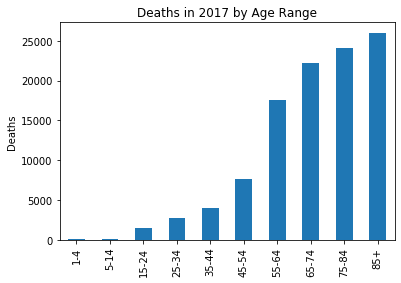

In [56]:
age_2017_counts.plot.bar(title="Deaths in 2017 by Age Range").set_ylabel("Deaths")